#Imports & Data Loading

In [15]:
# SECTION 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# For Colab file upload
from google.colab import files

# SECTION 2: Load Dataset from CSV
uploaded = files.upload()  # Upload your breast cancer CSV here

# Automatically read the first uploaded file
filename = list(uploaded.keys())[0]
print("Loaded file:", filename)

df = pd.read_csv(filename)
df.head()


Saving data.csv to data (2).csv
Loaded file: data (2).csv


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


#Basic Exploration & Cleaning


In [16]:
# SECTION 3: Basic Info & Cleaning
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Drop useless columns if present
cols_to_drop = []
for col in ['id', 'Unnamed: 32']:
    if col in df.columns:
        cols_to_drop.append(col)

df = df.drop(columns=cols_to_drop)
print("\nDropped columns:", cols_to_drop)

# Preview cleaned data
df.head()


Shape: (569, 33)

Columns:
 ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']

Missing values:
 id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
ra

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#Encode Target & Class Balance Visualization

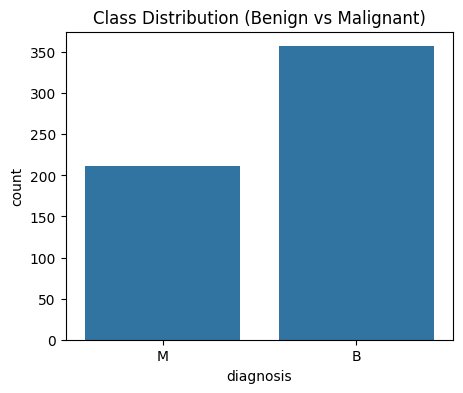

In [17]:
# SECTION 4: Encode Target Variable

# diagnosis: M = malignant, B = benign
df['diagnosis_encoded'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Verify encoding
df[['diagnosis', 'diagnosis_encoded']].head()

# Class balance
plt.figure(figsize=(5,4))
sns.countplot(x='diagnosis', data=df)
plt.title("Class Distribution (Benign vs Malignant)")
plt.show()


#Feature Selection & Train/Test Split

In [18]:
# SECTION 5: Feature-Target Split

X = df.drop(columns=['diagnosis', 'diagnosis_encoded'])
y = df['diagnosis_encoded']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])


Features shape: (569, 30)
Target shape: (569,)
Train size: 455
Test size: 114


#Feature Scaling


In [19]:
# SECTION 6: Feature Scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#Logistic Regression Model

In [20]:
# SECTION 7: Logistic Regression Model

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_pred_log = log_reg.predict(X_test_scaled)
y_prob_log = log_reg.predict_proba(X_test_scaled)[:, 1]

# Metrics
acc_log = accuracy_score(y_test, y_pred_log)
prec_log = precision_score(y_test, y_pred_log)
rec_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)
roc_log = roc_auc_score(y_test, y_prob_log)

print("🔹 Logistic Regression Performance")
print("Accuracy:", acc_log)
print("Precision:", prec_log)
print("Recall:", rec_log)
print("F1 Score:", f1_log)
print("ROC-AUC:", roc_log)

print("\nClassification Report:\n", classification_report(y_test, y_pred_log))


🔹 Logistic Regression Performance
Accuracy: 0.9649122807017544
Precision: 0.975
Recall: 0.9285714285714286
F1 Score: 0.9512195121951219
ROC-AUC: 0.996031746031746

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



#Confusion Matrix & ROC Curve (Logistic Regression)

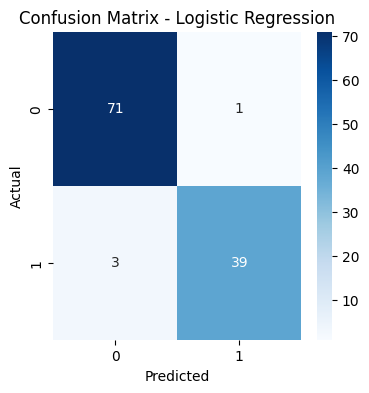

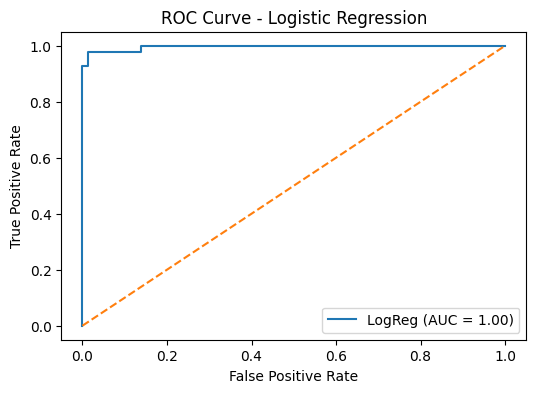

In [21]:
# Confusion Matrix
cm_log = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(4,4))
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
plt.figure(figsize=(6,4))
plt.plot(fpr_log, tpr_log, label=f"LogReg (AUC = {roc_log:.2f})")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()


#Random Forest Model

In [22]:
# SECTION 9: Random Forest Model

rf_clf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
rf_clf.fit(X_train, y_train)  # Can work without scaling

y_pred_rf = rf_clf.predict(X_test)
y_prob_rf = rf_clf.predict_proba(X_test)[:, 1]

# Metrics
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_rf = roc_auc_score(y_test, y_prob_rf)

print("🔹 Random Forest Performance")
print("Accuracy:", acc_rf)
print("Precision:", prec_rf)
print("Recall:", rec_rf)
print("F1 Score:", f1_rf)
print("ROC-AUC:", roc_rf)

print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


🔹 Random Forest Performance
Accuracy: 0.9649122807017544
Precision: 1.0
Recall: 0.9047619047619048
F1 Score: 0.95
ROC-AUC: 0.994212962962963

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



#Confusion Matrix, ROC Curve & Feature Importance (Random Forest)

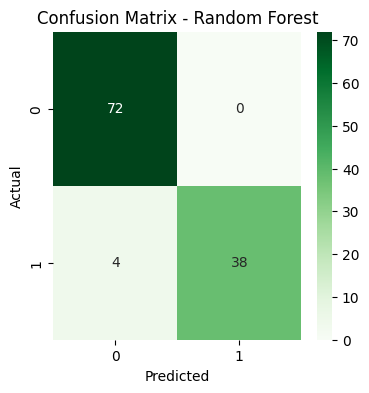

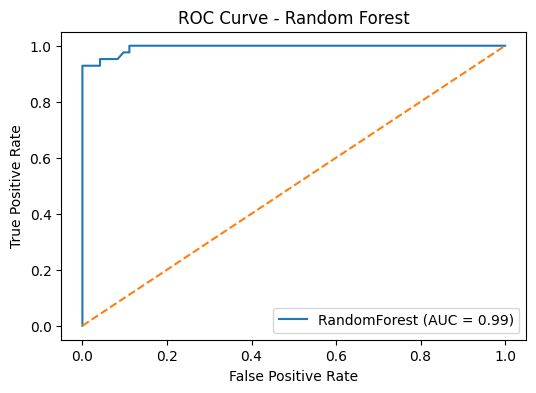

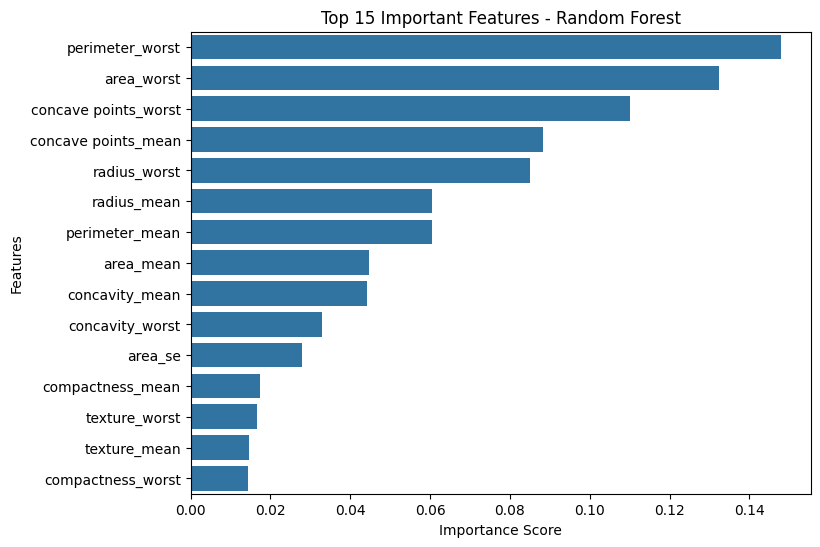

In [23]:
# Confusion Matrix - Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(4,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve - Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.figure(figsize=(6,4))
plt.plot(fpr_rf, tpr_rf, label=f"RandomForest (AUC = {roc_rf:.2f})")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

# Feature Importance
importances = rf_clf.feature_importances_
feature_names = X.columns

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)[:15]

plt.figure(figsize=(8,6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Top 15 Important Features - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()
